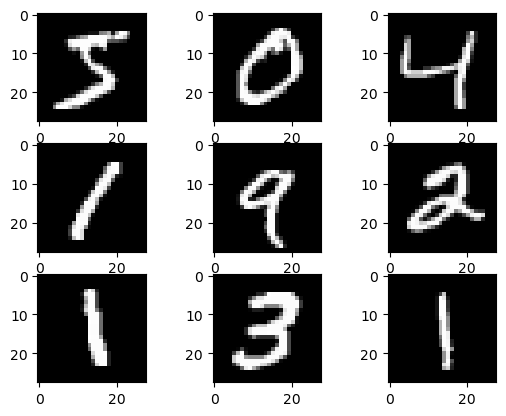

In [9]:
# Plot of images as baseline for comparison 
from keras.datasets import mnist 
from matplotlib import pyplot 
# load data 
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
# create a grid of 3x3 images 
for i in range(0, 9): 
    pyplot.subplot(330 + 1 + i) 
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the plot
pyplot.show()

In [19]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical  # Updated import

# Fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# Normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# One-hot encode outputs
y_train = to_categorical(y_train)  # Updated method
y_test = to_categorical(y_test)    # Updated method
num_classes = y_test.shape[1]

# Define baseline model
def baseline_model():
    # Create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Build the model
model = baseline_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100 - scores[1] * 100))

Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


300/300 - 1s - 5ms/step - accuracy: 0.9201 - loss: 0.2795 - val_accuracy: 0.9621 - val_loss: 0.1335
Epoch 2/10
300/300 - 1s - 4ms/step - accuracy: 0.9685 - loss: 0.1096 - val_accuracy: 0.9712 - val_loss: 0.0957
Epoch 3/10
300/300 - 1s - 4ms/step - accuracy: 0.9792 - loss: 0.0717 - val_accuracy: 0.9765 - val_loss: 0.0748
Epoch 4/10
300/300 - 1s - 4ms/step - accuracy: 0.9860 - loss: 0.0493 - val_accuracy: 0.9801 - val_loss: 0.0657
Epoch 5/10
300/300 - 1s - 4ms/step - accuracy: 0.9898 - loss: 0.0358 - val_accuracy: 0.9786 - val_loss: 0.0659
Epoch 6/10
300/300 - 1s - 4ms/step - accuracy: 0.9926 - loss: 0.0267 - val_accuracy: 0.9781 - val_loss: 0.0678
Epoch 7/10
300/300 - 1s - 4ms/step - accuracy: 0.9957 - loss: 0.0186 - val_accuracy: 0.9803 - val_loss: 0.0606
Epoch 8/10
300/300 - 1s - 4ms/step - accuracy: 0.9966 - loss: 0.0148 - val_accuracy: 0.9812 - val_loss: 0.0588
Epoch 9/10
300/300 - 1s - 4ms/step - accuracy: 0.9979 - loss: 0.0104 - val_accuracy: 0.9812 - val_loss: 0.0630
Epoch 10/10


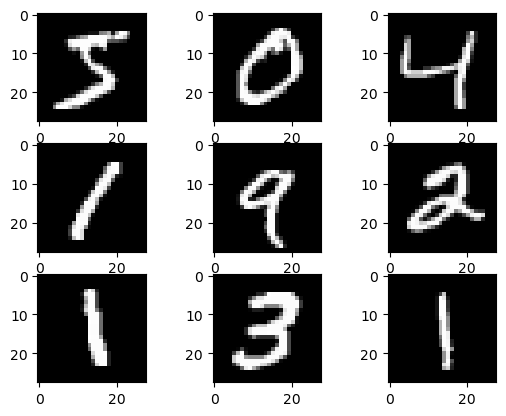

In [43]:
# Plot of images as baseline for comparison 
from keras.datasets import mnist 
from matplotlib import pyplot 
# load data 
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
# create a grid of 3x3 images 
for i in range(0, 9): 
    pyplot.subplot(330 + 1 + i) 
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the plot
pyplot.show()

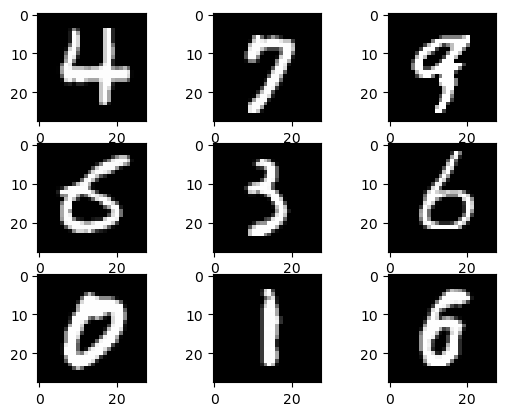

In [49]:
# Standardize images across the dataset, mean=0, stdev=1
from keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from tensorflow.keras import backend as K
K.set_image_data_format('channels_first')
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

In [ ]:
# ZCA whitening
from keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from tensorflow.keras import backend as K
K.set_image_data_format('channels_first')
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(zca_whitening=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

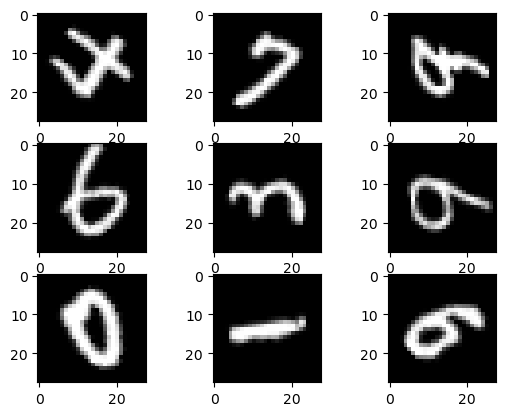

In [68]:
# Random Rotations
from keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from tensorflow.keras import backend as K
K.set_image_data_format('channels_first')
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

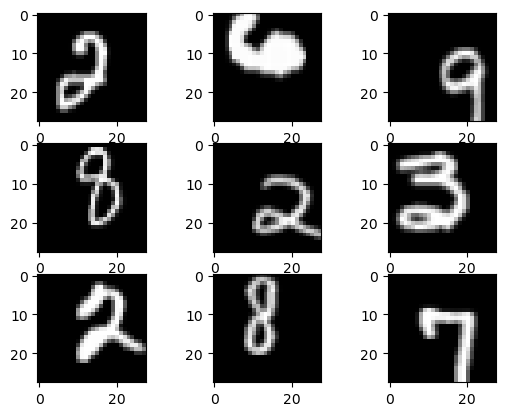

In [70]:
# Random Shifts
from keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from tensorflow.keras import backend as K
K.set_image_data_format('channels_first')
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break